# Predict the Salesprice of a house after analysing the given data.

Reading the data

In [1]:
#importing necessary modules
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv("train.csv")

In [3]:
df.shape

(1460, 81)

In [4]:
#To have an idea of the data
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
#To check all the columns name
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
#Checking null values and the types of data in that columns
def null(df):
    column=list(df.columns)
    for col in column:
        if df[col].isnull().sum()>0:
            print(col,'\t',df[col].isnull().sum(),'\t',df[col].dtypes)
null(df)

LotFrontage 	 259 	 float64
Alley 	 1369 	 object
MasVnrType 	 8 	 object
MasVnrArea 	 8 	 float64
BsmtQual 	 37 	 object
BsmtCond 	 37 	 object
BsmtExposure 	 38 	 object
BsmtFinType1 	 37 	 object
BsmtFinType2 	 38 	 object
Electrical 	 1 	 object
FireplaceQu 	 690 	 object
GarageType 	 81 	 object
GarageYrBlt 	 81 	 float64
GarageFinish 	 81 	 object
GarageQual 	 81 	 object
GarageCond 	 81 	 object
PoolQC 	 1453 	 object
Fence 	 1179 	 object
MiscFeature 	 1406 	 object


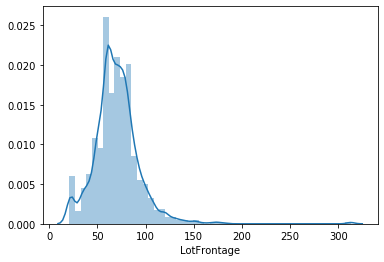

In [7]:
sns.distplot(df['LotFrontage'].dropna())

In [8]:
#Since the graph shows skewness, therefore its best to fill null values with its median.
def fill_lotfrontage(df):
    df.LotFrontage.fillna(df['LotFrontage'].median(),inplace=True)
    return df
df=fill_lotfrontage(df)

In [9]:
df.Alley.value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [10]:
#Since it is provided in the data description file, that it contains a 'no alley' label with NA values
#defining a class NoAlley to represent it
def fill_alley(df):
    df.Alley.fillna('NoAlley',inplace=True)
    return df
df=fill_alley(df)

Below is the visualizaiton for the two features, which clearly show us the outliers.

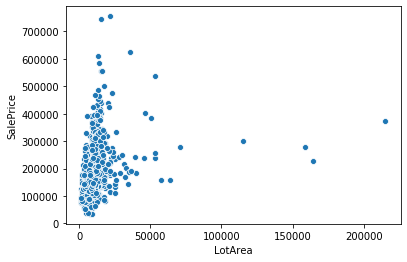

In [11]:
sns.scatterplot(x='LotArea',y='SalePrice',data=df)

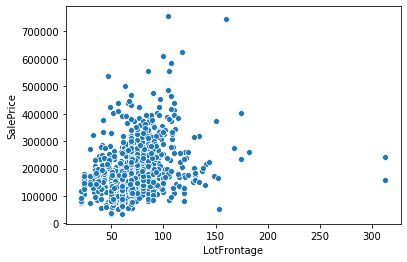

In [12]:
sns.scatterplot(x=df.LotFrontage,y=df.SalePrice,data=df)

In [13]:
def fill_poolqc(df):
    df.PoolQC.fillna("NoPool",inplace=True)
    return df
df=fill_poolqc(df)

In [14]:
df.PoolQC.value_counts()

NoPool    1453
Gd           3
Fa           2
Ex           2
Name: PoolQC, dtype: int64

In [15]:
def fill_fence(df):
    df.Fence.fillna("NoFence",inplace=True)
    return df
df=fill_fence(df)

In [16]:
df.Fence.value_counts()

NoFence    1179
MnPrv       157
GdPrv        59
GdWo         54
MnWw         11
Name: Fence, dtype: int64

In [17]:
def fill_miscfeature(df):
    df.MiscFeature.fillna("None",inplace=True)
    return df
df=fill_miscfeature(df)

In [18]:
df.MiscFeature.value_counts()

None    1406
Shed      49
Othr       2
Gar2       2
TenC       1
Name: MiscFeature, dtype: int64

In [19]:
def fill_garagecond(df):
    df.GarageCond.fillna("NoGarage",inplace=True)
    return df
df=fill_garagecond(df)

In [20]:
df.GarageCond.value_counts()

TA          1326
NoGarage      81
Fa            35
Gd             9
Po             7
Ex             2
Name: GarageCond, dtype: int64

In [21]:
def fill_garagequal(df):
    df.GarageQual.fillna("NoGarage",inplace=True)
    return df
df=fill_garagequal(df)

In [22]:
df.GarageQual.value_counts()

TA          1311
NoGarage      81
Fa            48
Gd            14
Ex             3
Po             3
Name: GarageQual, dtype: int64

In [23]:
def fill_garagefinish(df):
    df.GarageFinish.fillna("NoGarage",inplace=True)
    return df
df=fill_garagefinish(df)
df.GarageFinish.value_counts()

Unf         605
RFn         422
Fin         352
NoGarage     81
Name: GarageFinish, dtype: int64

In [24]:
def fill_garagetype(df):
    df.GarageType.fillna("NoGarage",inplace=True)
    return df
df=fill_garagetype(df)
df.GarageType.value_counts()

Attchd      870
Detchd      387
BuiltIn      88
NoGarage     81
Basment      19
CarPort       9
2Types        6
Name: GarageType, dtype: int64

In [25]:
def fill_garageyear(df):
    df.GarageYrBlt.fillna(0,inplace=True)
    return df
df=fill_garageyear(df)

In [26]:
def fill_fireplace(df):
    df.FireplaceQu.fillna("NoFireplace",inplace=True)
    return df
df=fill_fireplace(df)
df.FireplaceQu.value_counts()

NoFireplace    690
Gd             380
TA             313
Fa              33
Ex              24
Po              20
Name: FireplaceQu, dtype: int64

In [27]:
def fill_electrical(df):
    df.Electrical.fillna("NotSpecified",inplace=True)
    return df
df=fill_electrical(df)
df.Electrical.value_counts()

SBrkr           1334
FuseA             94
FuseF             27
FuseP              3
Mix                1
NotSpecified       1
Name: Electrical, dtype: int64

In [28]:
def fill_bsmtfilltype2(df):
    df.BsmtFinType2.fillna("NoBasement",inplace=True)
    return df
df=fill_bsmtfilltype2(df)
df.BsmtFinType2.value_counts()

Unf           1256
Rec             54
LwQ             46
NoBasement      38
BLQ             33
ALQ             19
GLQ             14
Name: BsmtFinType2, dtype: int64

In [29]:
def fill_bsmtfilltype1(df):
    df.BsmtFinType1.fillna("NoBasement",inplace=True)
    return df
df=fill_bsmtfilltype1(df)
df.BsmtFinType1.value_counts()

Unf           430
GLQ           418
ALQ           220
BLQ           148
Rec           133
LwQ            74
NoBasement     37
Name: BsmtFinType1, dtype: int64

In [30]:
def fill_bsmtqual(df):
    df.BsmtQual.fillna("NoBasement",inplace=True)
    return df
df=fill_bsmtqual(df)
df.BsmtQual.value_counts()

TA            649
Gd            618
Ex            121
NoBasement     37
Fa             35
Name: BsmtQual, dtype: int64

In [31]:
def fill_bsmtcond(df):
    df.BsmtCond.fillna("NoBasement",inplace=True)
    return df
df=fill_bsmtcond(df)
df.BsmtCond.value_counts()

TA            1311
Gd              65
Fa              45
NoBasement      37
Po               2
Name: BsmtCond, dtype: int64

In [32]:
def fill_bsmtexposure(df):
    df.BsmtExposure.fillna("NoBasement",inplace=True)
    return df
df=fill_bsmtexposure(df)
df.BsmtExposure.value_counts()

No            953
Av            221
Gd            134
Mn            114
NoBasement     38
Name: BsmtExposure, dtype: int64

In [33]:
def fill_masvnrtype(df):
    df.MasVnrType.fillna("NoStonework",inplace=True)
    return df
df=fill_masvnrtype(df)
df.MasVnrType.value_counts()

None           864
BrkFace        445
Stone          128
BrkCmn          15
NoStonework      8
Name: MasVnrType, dtype: int64

In [34]:
def fill_masvnrarea(df):
    df.MasVnrArea.fillna(df['MasVnrArea'].median(),inplace=True)
    return df
df=fill_masvnrarea(df)

In [35]:
#This is used to convert an object type column to int64 type
from sklearn.preprocessing import LabelEncoder

In [36]:
label=LabelEncoder()
def label_encode(df):
    column=list(df.columns)
    for col in column:
        if df[col].dtypes==object:
            df[col]=label.fit_transform(df[col])
    return df
df=label_encode(df)

In [37]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,1,3,3,0,...,0,3,4,1,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,1,3,3,0,...,0,3,4,1,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,1,0,3,0,...,0,3,4,1,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,1,0,3,0,...,0,3,4,1,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,1,0,3,0,...,0,3,4,1,0,12,2008,8,4,250000


In [38]:
#Since, the target column contains continuous data, so Linear Regression is best to be used
from sklearn.linear_model import LinearRegression
#train_test_split is used to split the data into train and test
from sklearn.model_selection import train_test_split

In [39]:
ridge=LinearRegression()
train,test=train_test_split(df,test_size=0.2,random_state=50)

In [40]:
def x_and_y(df):
    x=df.drop(['SalePrice'],axis=1)
    y=df['SalePrice']
    return x,y
x_train,y_train=x_and_y(train)
x_test,y_test=x_and_y(test)

In [41]:
#here, we will use fit function to make our model
ridge.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
#predictions are made using predict() function
prediction=ridge.predict(x_train)

In [43]:
#r2_score metric is used for evaluation
from sklearn.metrics import r2_score

In [44]:
r_metrics=r2_score(y_train,prediction)
print(r_metrics)

0.8529277799265835


In [45]:
test_prediction =ridge.predict(x_test)
test_score=r2_score(y_test,test_prediction)
print(test_score)
#since score is approx. near to the train score, this model seems fit to be applied

0.8193140089233483


In [46]:
#cross_val_score checks randomly dfferent set of values from the given set onto our model
from sklearn.model_selection import cross_val_score
cross=cross_val_score(ridge,x_train,y_train,cv=6)
print(cross)

[0.53819497 0.80062904 0.88495026 0.85257969 0.68946538 0.77057038]


In [47]:
cross.mean()

0.7560649520474679

In [48]:
cross2=cross_val_score(ridge,x_test,y_test,cv=6)
print(cross)

[0.53819497 0.80062904 0.88495026 0.85257969 0.68946538 0.77057038]


In [49]:
cross2.mean()
#cross_val for train and test is nearly same

0.7526433434929817

In [50]:
#Since our model has been made, its time to make prediction
df2=pd.read_csv('test.csv')
null(df2)

MSZoning 	 4 	 object
LotFrontage 	 227 	 float64
Alley 	 1352 	 object
Utilities 	 2 	 object
Exterior1st 	 1 	 object
Exterior2nd 	 1 	 object
MasVnrType 	 16 	 object
MasVnrArea 	 15 	 float64
BsmtQual 	 44 	 object
BsmtCond 	 45 	 object
BsmtExposure 	 44 	 object
BsmtFinType1 	 42 	 object
BsmtFinSF1 	 1 	 float64
BsmtFinType2 	 42 	 object
BsmtFinSF2 	 1 	 float64
BsmtUnfSF 	 1 	 float64
TotalBsmtSF 	 1 	 float64
BsmtFullBath 	 2 	 float64
BsmtHalfBath 	 2 	 float64
KitchenQual 	 1 	 object
Functional 	 2 	 object
FireplaceQu 	 730 	 object
GarageType 	 76 	 object
GarageYrBlt 	 78 	 float64
GarageFinish 	 78 	 object
GarageCars 	 1 	 float64
GarageArea 	 1 	 float64
GarageQual 	 78 	 object
GarageCond 	 78 	 object
PoolQC 	 1456 	 object
Fence 	 1169 	 object
MiscFeature 	 1408 	 object
SaleType 	 1 	 object


In [51]:
#Similar steps has been taken as were taken for train dataset.
def call_all_functions(df):
    fill_alley(df)
    fill_lotfrontage(df)
    fill_poolqc(df)
    fill_fence(df)
    fill_miscfeature(df)
    fill_garagecond(df)
    fill_garagequal(df)
    fill_garagefinish(df)
    fill_garagetype(df)
    fill_garageyear(df)
    fill_fireplace(df)
    fill_electrical(df)
    fill_bsmtfilltype2(df)
    fill_bsmtfilltype1(df)
    fill_bsmtqual(df)
    fill_bsmtcond(df)
    fill_bsmtexposure(df)
    fill_masvnrtype(df)
    fill_masvnrarea(df)
    return df
df2=call_all_functions(df2)

In [52]:
null(df2)

MSZoning 	 4 	 object
Utilities 	 2 	 object
Exterior1st 	 1 	 object
Exterior2nd 	 1 	 object
BsmtFinSF1 	 1 	 float64
BsmtFinSF2 	 1 	 float64
BsmtUnfSF 	 1 	 float64
TotalBsmtSF 	 1 	 float64
BsmtFullBath 	 2 	 float64
BsmtHalfBath 	 2 	 float64
KitchenQual 	 1 	 object
Functional 	 2 	 object
GarageCars 	 1 	 float64
GarageArea 	 1 	 float64
SaleType 	 1 	 object


In [53]:
#Null values has been replaced by their modes
df2['MSZoning'].fillna(df2['MSZoning'].mode()[0],inplace=True)
df2['Utilities'].fillna(df2['Utilities'].mode()[0],inplace=True)
df2['Exterior1st'].fillna(df2['Exterior1st'].mode()[0],inplace=True)
df2['Exterior2nd'].fillna(df2['Exterior2nd'].mode()[0],inplace=True)
df2['KitchenQual'].fillna(df2['KitchenQual'].mode()[0],inplace=True)
df2['Functional'].fillna(df2['Functional'].mode()[0],inplace=True)
df2['SaleType'].fillna(df2['SaleType'].mode()[0],inplace=True)

In [54]:
df2['BsmtFinSF1'].fillna(0,inplace=True)
df2['BsmtFinSF2'].fillna(0,inplace=True)
df2['TotalBsmtSF'].fillna(0,inplace=True)
df2['BsmtFullBath'].fillna(0,inplace=True)
df2['BsmtHalfBath'].fillna(0,inplace=True)
df2['BsmtUnfSF'].fillna(0,inplace=True)
df2['GarageCars'].fillna(0,inplace=True)
df2['GarageArea'].fillna(0,inplace=True)

In [55]:
df2=label_encode(df2)

In [56]:
column=list(df.columns)
for col in column:
    if df[col].dtypes==object:
        print(col,df[col].dtypes)

In [57]:
final_prediction=ridge.predict(df2)

In [58]:
#Final prediction has been saved in this variable
final_prediction

array([256401.04361665, 297225.8768243 , 319056.81127168, ...,
       290606.58894364, 276238.5008896 , 397996.92974075])

In [59]:
#now, we have to export the prediction by creaing a dataframe
diction={'Id':df2['Id'],'SalePrice':final_prediction}
df3=pd.DataFrame(diction)
df3.to_csv('Submission.csv',index=False)